In [1]:
# For data processing, management, and file reading
import pandas as pd
# For statistical analyses
import numpy as np

In [2]:
# Visualizing the data through plots
import matplotlib.pyplot as plt
# Making them pretty
import seaborn as sns
%matplotlib inline

Gaming has had an upsurge of popularity in the last couple years, where not only do people make livelihoods making them, but also playing them. This can range from casual Let's Plays to competitive e-sports games, but what types of games are the most popular to everyone? 

There was a deep seeded desire in me to learn what that answer was for the PS4, as I just recently bought it and was very indecisive in buying my next game. What better way to find out than to use data to come to my conclusions? I extracted the data from VGChartz.com to learn more.

In [3]:
# Reading file as a dataframe
df = pd.read_csv("PS4_VGChartz.csv", encoding = "ISO-8859-1")

In [4]:
# Keys of the dataframe
df.keys()

Index(['Game', 'Platform', 'Year', 'Genre', 'Publisher', 'North America',
       'Europe', 'Japan', 'Rest of World'],
      dtype='object')

In [5]:
# Renamed a couple keys so I don't have to worry about spaces
df = df.rename(columns={'North America': 'NA', 'Rest of World': 'Rest_of_World'})

In [6]:
# Snapshot of the dataframe
df.head()

,Game,Platform,Year,Genre,Publisher,NA,Europe,Japan,Rest_of_World
0,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,4.59,7.71,0.48,2.35
1,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.97,6.07,0.37,2.40
2,FIFA 17,PS4,2016.0,Sports,Electronic Arts,1.15,7.88,0.11,1.58
3,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,3.88,3.39,0.20,1.47
4,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.14,6.14,0.07,1.28


In [7]:
# A breakdown of what type of data I have on hand
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 9 columns):
Game             875 non-null object
Platform         876 non-null object
Year             685 non-null float64
Genre            875 non-null object
Publisher        684 non-null object
NA               876 non-null float64
Europe           876 non-null float64
Japan            876 non-null float64
Rest_of_World    876 non-null float64
dtypes: float64(5), object(4)
memory usage: 61.7+ KB


Gameplay is very important aspect to my enjoyability. I enjoy a lot of JRPG's, but that doesn't mean I don't like the occasional Call of Duty now and then. Within my dataset, I found that there was regional and genre data that I could manipulate, so I decided to focus on the total number of sales versus genre by each region provided.

There are a couple footnotes to this data:
<li>1) The top-selling PlayStation 4 games (all figures in millions of units sold-through since launch)</li>
<li>2) The minimum amount they track is if the game makes 10,000 sales. Below that, the values show up as 0.00</li>


In [8]:
# This functions groups the different parts of the database
# params: db <dataframe>, base database; metric <string>, the value we use to groupby; regions <list>, list of regions
# return: final_db <dataframe>, a database centered on the metric we groupby; global_total <series>, the totals of all the regions
def groupedDB(db, metric, regions = ['NA', 'Europe', 'Japan', 'Rest_of_World']):
    # Groupby metric and create series, add those series to a list
    series_list = []
    for area in regions:
        series_list.append(db.groupby(metric)[area].sum())
    total_per_region = pd.concat(series_list, axis=1)
    
    # Creates the totals based off all the regions and allocates them to its own series
    global_total = total_per_region.sum(axis=1)
    global_total.name = 'Global_Total'
    
    # Concatenates the series to the database 
    final_db = pd.concat([total_per_region, global_total], axis=1)
    
    return(final_db,global_total)

I use the above function throughout this code, but I left a specific example for people to understand what's happening (more readability).

In [9]:
# Grouped the values by region, and created another dataframe for it. Also added a new column for all the sales made globally

# Regional Grouping
NA_Genre_Total = df.groupby('Genre')['NA'].sum()
Europe_Genre_Total = df.groupby('Genre')['Europe'].sum()
Japan_Genre_Total = df.groupby('Genre')['Japan'].sum()
ROW_Genre_Total = df.groupby('Genre')['Rest_of_World'].sum()

Sales_By_Region = pd.concat([NA_Genre_Total, Europe_Genre_Total, Japan_Genre_Total,ROW_Genre_Total], axis=1)

# Adding the total numbers
Global_Genre_Total = Sales_By_Region.sum(axis=1)
Global_Genre_Total.name = 'Global_Total'

# Final data frame
Total_Genre_Sales = pd.concat([Sales_By_Region, Global_Genre_Total], axis=1)

Here we have the total amount of sales per genre for each region, as well as a total worldwide.

In [10]:
Total_Genre_Sales

,NA,Europe,Japan,Rest_of_World,Global_Total
Genre,,,,,
Action,39.79,52.12,8.47,17.89,118.27
Adventure,2.71,3.53,0.65,1.21,8.10
Fighting,4.09,3.27,1.00,1.49,9.85
Misc,3.96,3.97,0.73,1.59,10.25
Platform,2.97,4.03,0.52,1.34,8.86
Puzzle,0.03,0.03,0.00,0.02,0.08
Racing,3.04,8.01,0.34,2.02,13.41
Role-Playing,13.19,15.40,5.73,5.61,39.93
Shooter,39.16,45.44,3.34,16.50,104.44


I have plotted the number of sales made per genre with a bar chart below.

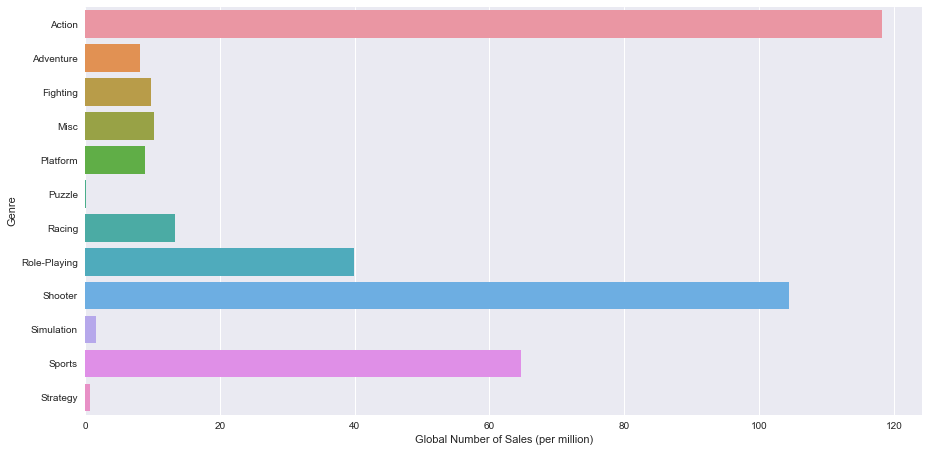

In [11]:
# I plotted the total number of sales made through seaborn, came out pretty nice and colorful
plt.figure(figsize = (15,7.5))
Genre_Plot = sns.barplot(x = Total_Genre_Sales.Global_Total.values, y = Total_Genre_Sales.Global_Total.index, orient = 'h')
Genre_Plot.set(xlabel='Global Number of Sales (per million)', ylabel='Genre')
plt.show()

Based off this plot, the 'Action' genre does exceedingly well. It makes sense, its defined as "genre that emphasizes physical challenges, including hand–eye coordination and reaction-time," (the wikipedia article on Action games) which can encompass a lot of these genres shown below. 

'Shooter' and 'Sports' follows in 2nd and 3rd place respectively, two highly competitive gaming genres that emphasize multiplayer. However, it was interesting to see 'Role-Playing' come in at a distant 4th in terms of sales. Most RPG's (Role-Playing Games), if not all, are single-player games that don't require additional controllers, good wi-fi, or other people. However, 39.93 million PS4 Role-Playing games were sold in the PS4's lifespan, which means around 40 million people didn't mind playing with themselves .  

I wanted to hone in on RPG data specifically, so I created a database specifically for them.

In [12]:
RPG_Database = df[df['Genre'] == 'Role-Playing']

In [13]:
RPG_Database.head()

,Game,Platform,Year,Genre,Publisher,NA,Europe,Japan,Rest_of_World
7,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.64,3.49,0.25,1.20
15,Final Fantasy XV,PS4,2016.0,Role-Playing,Square Enix,1.39,1.61,0.96,0.59
16,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,Namco Bandai Games,1.12,2.30,0.25,0.64
45,The Elder Scrolls V: Skyrim,PS4,2016.0,Role-Playing,Bethesda Softworks,0.92,1.02,0.07,0.38
51,Diablo III,PS4,2014.0,Role-Playing,Activision,0.58,1.08,0.08,0.32


There are a lot of different publishers in this genre, how many games have they each published? 

In [14]:
# Create dataframe to collect games per game data
Number_of_Games = RPG_Database.groupby(['Publisher'], as_index=False).count()
Games_Per_Publisher = pd.concat([Number_of_Games['Publisher'], Number_of_Games['Game']], axis=1, keys=['Publisher', 'Number_of_Games'])

In [15]:
Games_Per_Publisher.head()

,Publisher,Number_of_Games
0,505 Games,2
1,Activision,1
2,Aksys Games,1
3,Atlus,1
4,Bethesda Softworks,3


Now that we have this data, lets combine it with their number of sales and see if there's a correlation between the number of games and the amount of sales made worldwide.

In [16]:
Total_RPG_Publishers, Global_RPG_Publishers= groupedDB(RPG_Database, "Publisher")

In [17]:
# Finessing this as a dataframe further
Global_RPG_Publishers = pd.DataFrame(Global_RPG_Publishers)
Global_RPG_Publishers = Global_RPG_Publishers.reset_index()
Global_RPG_Publishers = Global_RPG_Publishers.rename(columns={'index': 'Publisher'})

In [18]:
Global_RPG_Publishers.head()

,Publisher,Global_Total
0,505 Games,0.00
1,Activision,2.06
2,Aksys Games,0.04
3,Atlus,0.40
4,Bethesda Softworks,11.79


In [19]:
# Merging the dataframes based on the publisher
Publishers_Games = pd.merge(Global_RPG_Publishers, Games_Per_Publisher, how='inner', on=['Publisher'])

Here is the final table of our data set of publishers, the number of games they have published, and the global sales they have made on those games.

In [20]:
Publishers_Games

,Publisher,Global_Total,Number_of_Games
0,505 Games,0.00,2
1,Activision,2.06,1
2,Aksys Games,0.04,1
3,Atlus,0.40,1
4,Bethesda Softworks,11.79,3
5,CD Projekt Red Studio,0.00,1
6,Capcom,0.09,3
7,Compile Heart,0.02,1
8,Deep Silver,0.19,3
9,Disney Interactive Studios,0.00,1


Below we have a heatmap representation of the table above. The Y axis gives us the publishers while the X axis gives us the number of games they have published. The intensity (hue) of the heatmap is the number of sales made; A lighter color represents a low amount of sales while a darker color represents a high amount of sales.

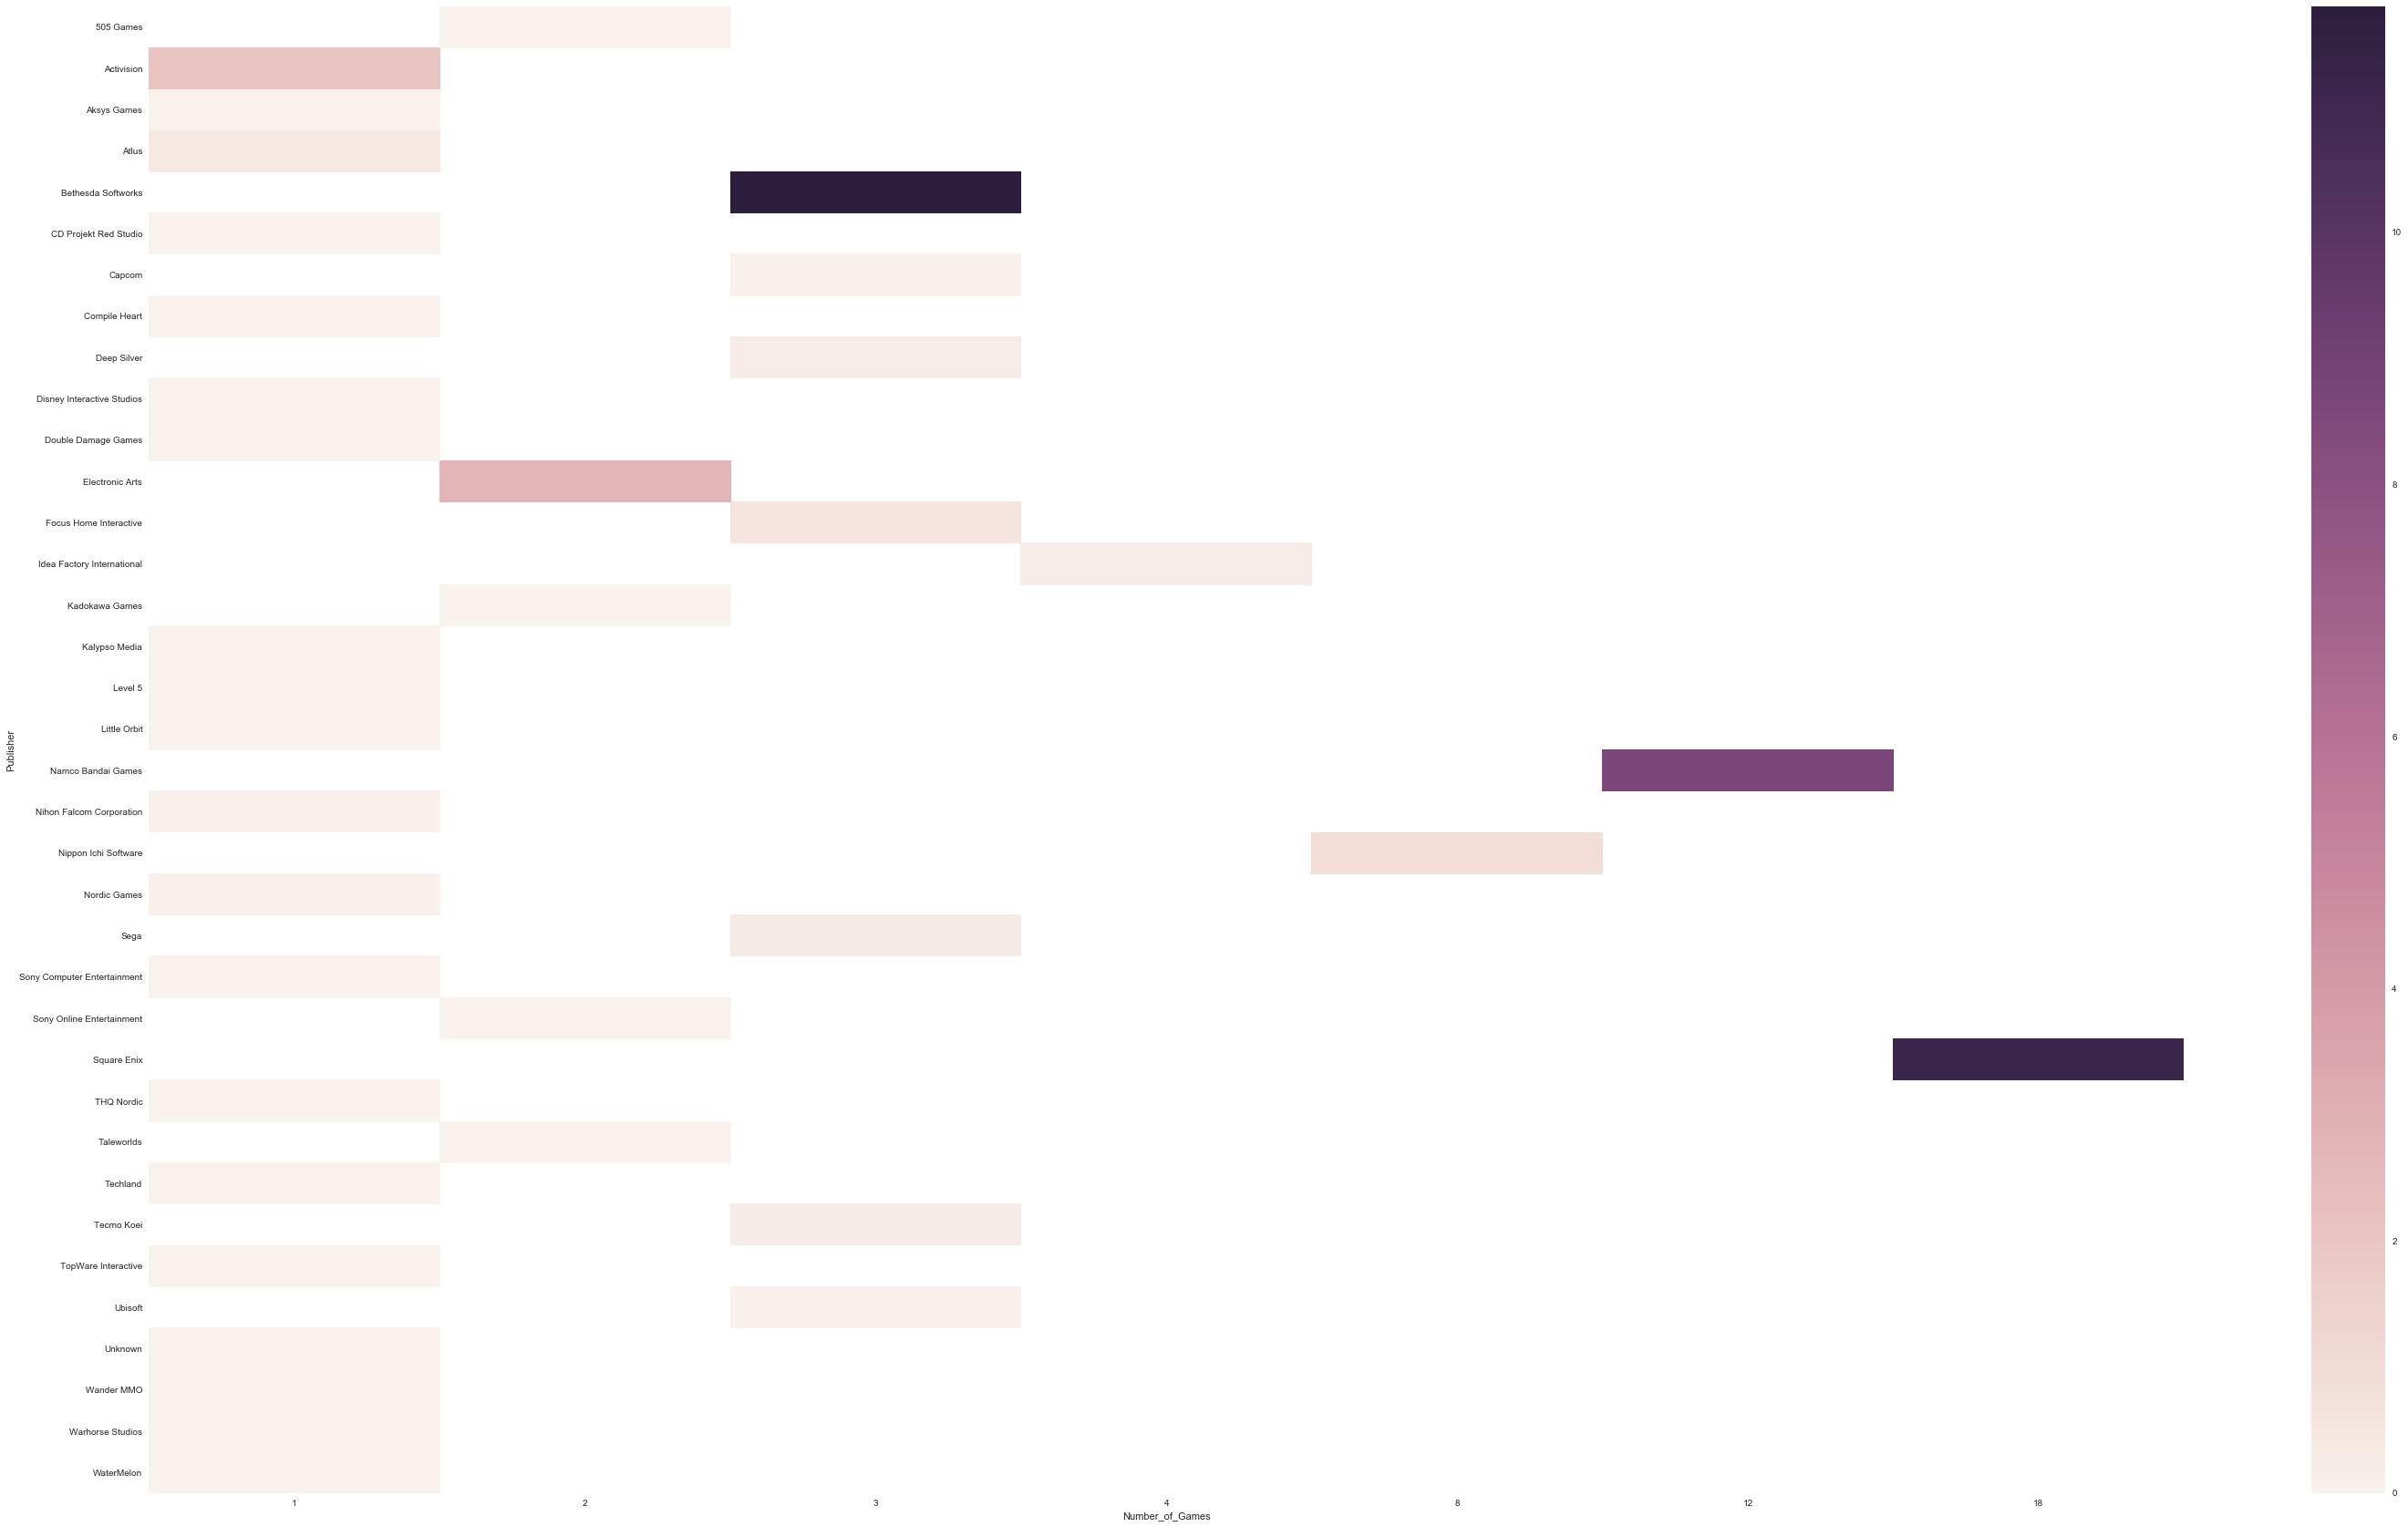

In [21]:
# Created a pivot for the database so we can create a heatmap visualization
result = Publishers_Games.pivot(index='Publisher', columns='Number_of_Games', values='Global_Total')

plt.figure(figsize = (50,30))
sns.set(style="whitegrid")
sns.heatmap(result)
plt.show()

The significant points that leapt out to me in this heatmap are the two publishers who have the highest amount of sales, Bethesda Softworks and Square Enix. What's interesting to note, however, is the number of games each Publisher has produced. Square Enix has published 18 games to Bethesda Softworks' 3 games. Why is that?

In [22]:
Bethesda_Square = RPG_Database.loc[(RPG_Database['Publisher']=='Square Enix') | (RPG_Database['Publisher']=='Bethesda Softworks')]

In [23]:
Bethesda_Square

,Game,Platform,Year,Genre,Publisher,NA,Europe,Japan,Rest_of_World
7,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.64,3.49,0.25,1.20
15,Final Fantasy XV,PS4,2016.0,Role-Playing,Square Enix,1.39,1.61,0.96,0.59
45,The Elder Scrolls V: Skyrim,PS4,2016.0,Role-Playing,Bethesda Softworks,0.92,1.02,0.07,0.38
62,The Elder Scrolls Online,PS4,2015.0,Role-Playing,Bethesda Softworks,0.72,0.80,0.00,0.30
93,Final Fantasy Type-0,PS4,2015.0,Role-Playing,Square Enix,0.38,0.32,0.16,0.14
108,Final Fantasy X/X-2 HD Remaster,PS4,2015.0,Role-Playing,Square Enix,0.30,0.30,0.07,0.12
110,Final Fantasy XIV: A Realm Reborn,PS4,2014.0,Role-Playing,Square Enix,0.35,0.23,0.08,0.12
117,Kingdom Hearts HD 2.8 Final Chapter Prologue,PS4,2017.0,Role-Playing,Square Enix,0.29,0.13,0.19,0.09
134,Deus Ex: Mankind Divided,PS4,2016.0,Role-Playing,Square Enix,0.24,0.24,0.01,0.10
140,Lords of the Fallen,PS4,2014.0,Role-Playing,Square Enix,0.19,0.24,0.02,0.08


A closer look at the data shows that there are quite a lot of games that haven't come out as of now (May 2017), so ideally we need to look at everything that has been released. I refine this database by only taking everything released as of 2017.

In [24]:
# The years are not in datetime format, but in float form. Unorthodox, but we'll manage.
Bethesda_Square = Bethesda_Square.loc[(Bethesda_Square['Year']<=2017)]

In [25]:
Bethesda_Square

,Game,Platform,Year,Genre,Publisher,NA,Europe,Japan,Rest_of_World
7,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.64,3.49,0.25,1.20
15,Final Fantasy XV,PS4,2016.0,Role-Playing,Square Enix,1.39,1.61,0.96,0.59
45,The Elder Scrolls V: Skyrim,PS4,2016.0,Role-Playing,Bethesda Softworks,0.92,1.02,0.07,0.38
62,The Elder Scrolls Online,PS4,2015.0,Role-Playing,Bethesda Softworks,0.72,0.80,0.00,0.30
93,Final Fantasy Type-0,PS4,2015.0,Role-Playing,Square Enix,0.38,0.32,0.16,0.14
108,Final Fantasy X/X-2 HD Remaster,PS4,2015.0,Role-Playing,Square Enix,0.30,0.30,0.07,0.12
110,Final Fantasy XIV: A Realm Reborn,PS4,2014.0,Role-Playing,Square Enix,0.35,0.23,0.08,0.12
117,Kingdom Hearts HD 2.8 Final Chapter Prologue,PS4,2017.0,Role-Playing,Square Enix,0.29,0.13,0.19,0.09
134,Deus Ex: Mankind Divided,PS4,2016.0,Role-Playing,Square Enix,0.24,0.24,0.01,0.10
140,Lords of the Fallen,PS4,2014.0,Role-Playing,Square Enix,0.19,0.24,0.02,0.08


Further inspection of the data reveals further inconsistencies:
<li> 1) Project Setsuna and Ikenie to Yuki no Setsuna are the same game, just written in English and Japanese, respectively</li>
<li> 2) Final Fantasy XIV: Stormblood actually hasn't come out yet, it is slated for June 2017. </li>

I refine the database further by removing/ consolidating the entries.

In [26]:
Bethesda_Square = Bethesda_Square.drop([787,818])

The data is a bit cleaner now. Lets get the total world wide sales of each game.

In [27]:
Total_Publisher_Games, Publisher_Games_Sold= groupedDB(Bethesda_Square, "Game")

In [28]:
Publisher_Games_Sold = pd.DataFrame(Publisher_Games_Sold)
Publisher_Games_Sold = Publisher_Games_Sold.reset_index()
Publisher_Games_Sold = Publisher_Games_Sold.rename(columns={'index': 'Game'})

In [29]:
Bethesda_Square_Games = pd.merge(Bethesda_Square, Publisher_Games_Sold, how='inner', on=['Game'])

In [30]:
Bethesda_Square_Games.loc[Bethesda_Square_Games['Publisher']== 'Bethesda Softworks']

,Game,Platform,Year,Genre,Publisher,NA,Europe,Japan,Rest_of_World,Global_Total
0,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.64,3.49,0.25,1.20,7.58
2,The Elder Scrolls V: Skyrim,PS4,2016.0,Role-Playing,Bethesda Softworks,0.92,1.02,0.07,0.38,2.39
3,The Elder Scrolls Online,PS4,2015.0,Role-Playing,Bethesda Softworks,0.72,0.80,0.00,0.30,1.82


Based on what we see in the above global sales, Fallout 4 makes up a huge chunk of sales for Bethesda. The total sales made by Square Enix is beaten by that of Bethesda by a small margin; however, the amount of games shows a stark difference between the companies. This can be due to a number of reasons, whether its the development, the marketing, or the quality of the games, but we can't really make those assumptions without more data.

It's interesting to see 16 games make nearly the same amount as that of 3 games, what's the distribution of what's being sold?

In [31]:
Square_Enix = Bethesda_Square_Games.loc[Bethesda_Square_Games['Publisher']== 'Square Enix']
SE_Games_Sold = pd.concat([Square_Enix['Game'], Square_Enix['Global_Total']], axis=1, keys=['Game', 'Global_Total'])

Lets normalize our data and then create a standard normal distribution plot

In [32]:
# This function calculates standard_score
# params: average <int>, an average; standard_deviation <int>, a standard deviation; raw_value <int>, a value
# return: standard_score <float>, the standard score
def standard_score(average, standard_deviation, raw_value):
    return ((float(raw_value) - float(average))/float(standard_deviation))

# This function turns a list with indices into a series
# params: indices <list>, list of indices; values <list>, list of values
# return: <dataframe>, a series of those two lists combined
def normalized(indices, values, average, standard_deviation):
    normalized_values = []
    for val in values:
        normal = standard_score(average, standard_deviation, val)
        normalized_values.append(normal)
    return (pd.DataFrame(normalized_values, index = indices))

In [33]:
# average of global sales
mean = np.mean(SE_Games_Sold['Global_Total'])
# standard deviation of global sales
std = np.std(SE_Games_Sold['Global_Total'])
# indices of the entries
game_indices = list(SE_Games_Sold.index)
# all the square enix global sales
sales = list(SE_Games_Sold['Global_Total'].values)

normalized_df = normalized(game_indices, sales, mean, std)
normalized_df = normalized_df.rename(columns={0:'Normalized'})

In [34]:
SE_Games_Sold = SE_Games_Sold.join(normalized_df)

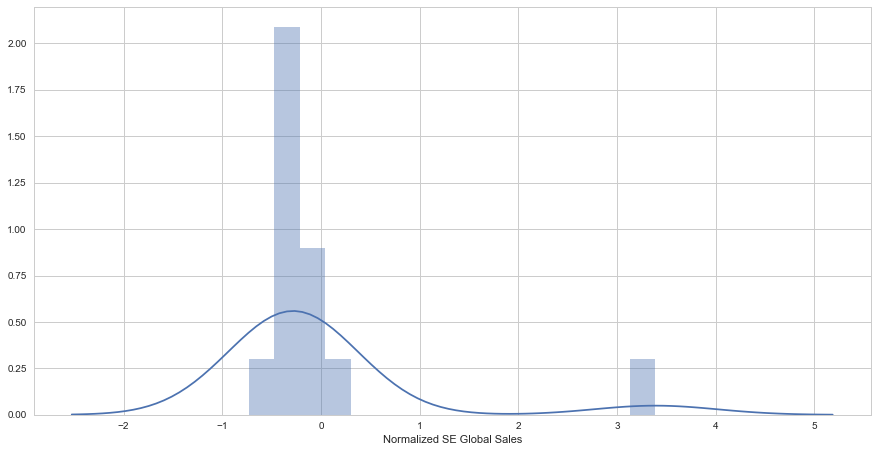

In [35]:
plt.figure(figsize = (15,7.5))
Normalized_Dist = sns.distplot(SE_Games_Sold['Normalized'])
Normalized_Dist.set(xlabel='Normalized SE Global Sales')
plt.show()